In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets
import classical_part, utilities, entangled_circuit
import random, qiskit
%load_ext autoreload
%autoreload 2

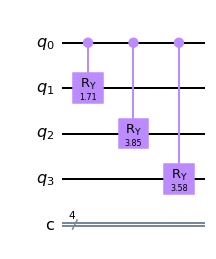

In [7]:
n = 4
qc = qiskit.QuantumCircuit(n, n)
qc = entangled_circuit.quanvolutional(qc)
qc.draw('mpl')

[3.18125929 2.27053764 4.18687009]
[2, 1, 0]


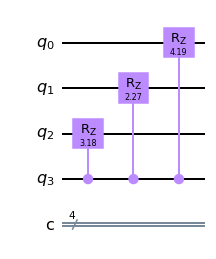

In [16]:
n = 4
qc = qiskit.QuantumCircuit(n, n)
thetas = np.random.uniform(low=0, high=2*np.pi, size=(n*n + 3*n,))
qc = entangled_circuit.decrease_r_layer(qc, thetas[2*n:2*n + n - 1], type = 'rz', control_index = n - 1)
qc.draw('mpl')

In [42]:
list_of_quanv = {
      '1': entangled_circuit.quanvolutional1, 
      '3': entangled_circuit.quanvolutional3,
      '4': entangled_circuit.quanvolutional4,
}

for a in list_of_quanv:
    print(type(list_of_quanv[a]))

<class 'function'>
<class 'function'>
<class 'function'>
